In [73]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

### 데이터 불러오기

In [2]:
file_path = './data_4dist/data_ts_4dist.csv'

train_sp = pd.read_csv(file_path)
train_sp.rename(columns={'4단지배수지 공업 유출유량 적산차':'4dist'}, inplace=True)

print(type(train_sp))

<class 'pandas.core.frame.DataFrame'>


In [3]:
train_sp.head()

,datetime,4dist
0,2021-01-01 00:00:00,366.0
1,2021-01-01 01:00:00,486.0
2,2021-01-01 02:00:00,364.0
3,2021-01-01 03:00:00,356.0
4,2021-01-01 04:00:00,500.0


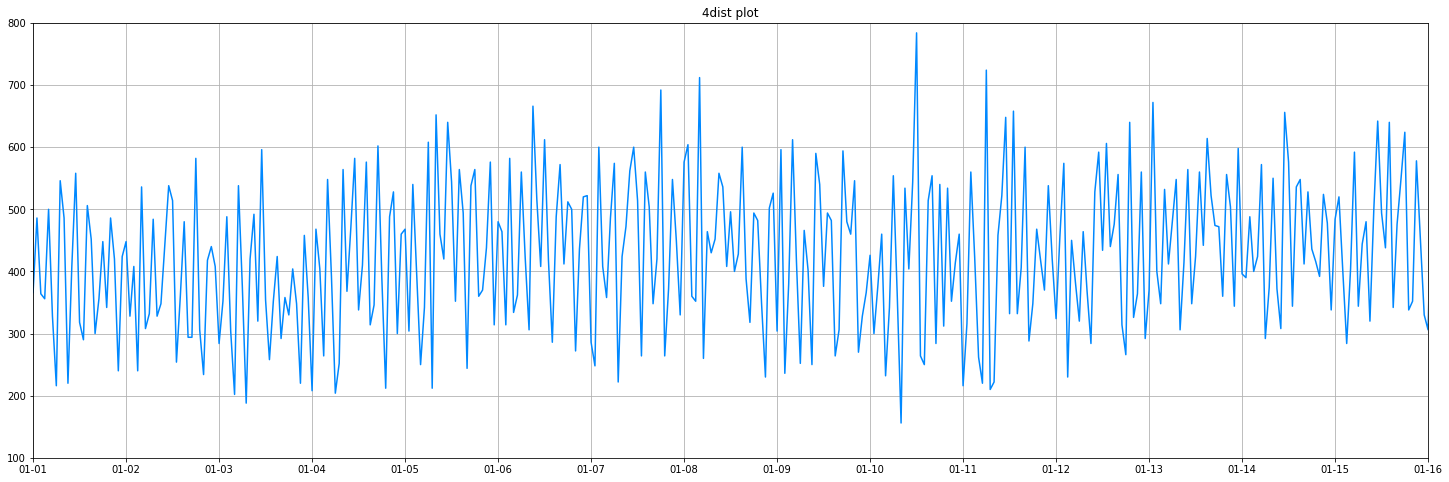

In [5]:
plt.rcParams['figure.figsize'] = (25.0, 8.0)\

x = np.arange(0, len(train_sp), 24)
date = train_sp['datetime'].str.slice(start=5, stop=10)
date_x = list(range(len(x)))
for i in range(len(x)):
    j = i * 24
    date_x[i]=date[j]

plt.title("4dist plot")
plt.ylim(100, 800)
plt.xticks(x, labels=date_x)
plt.xlim(0, 360)
plt.grid(True)
plt.plot(train_sp['4dist'], color='#0088ff')

plt.show()

In [6]:
type(train_sp['datetime'])

pandas.core.series.Series

##### error

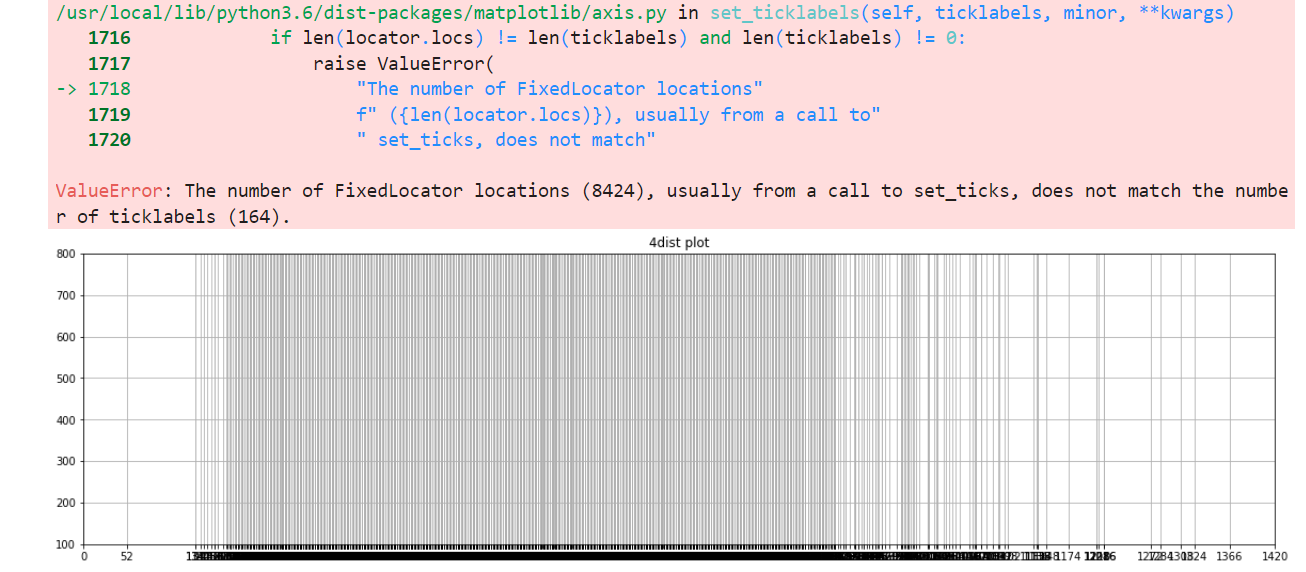

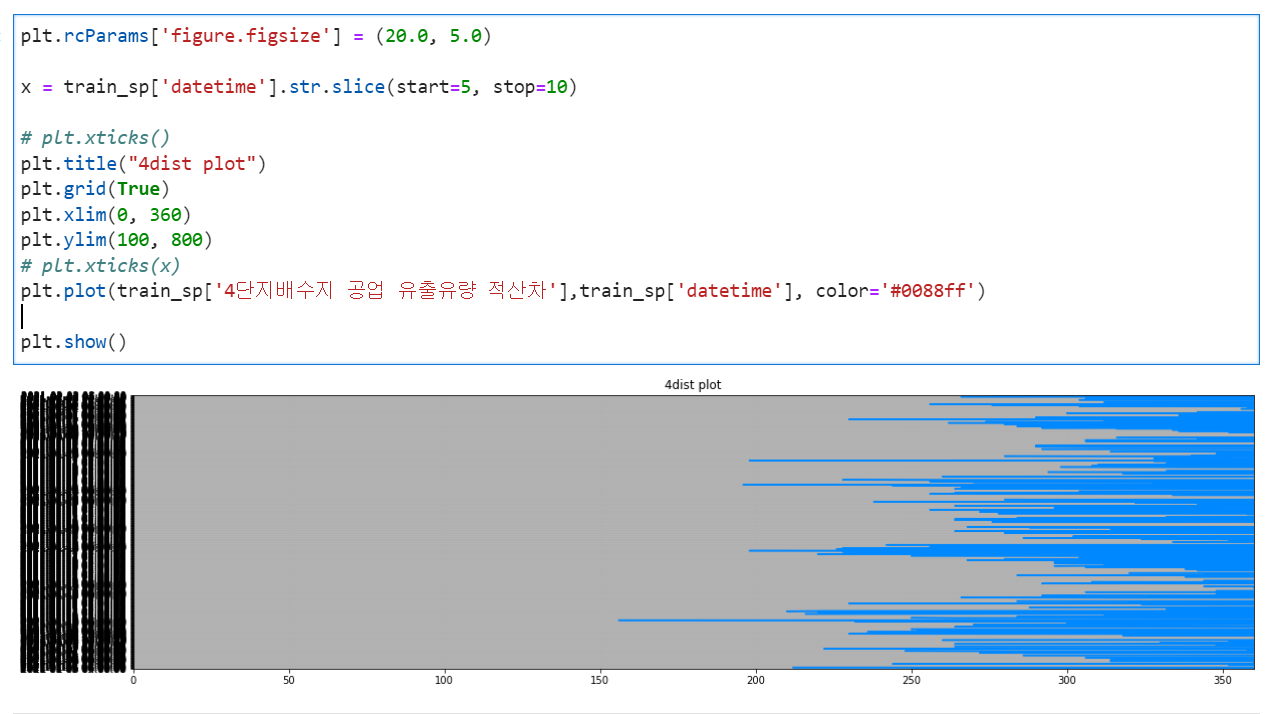

### 데이터 분할

In [156]:
test_size = 366 * 8
train_set = train_sp[: -test_size]
test_set = train_sp[-test_size:]

In [157]:
train_set

,datetime,4dist
0,2021-01-01 00:00:00,366.0
1,2021-01-01 01:00:00,486.0
2,2021-01-01 02:00:00,364.0
3,2021-01-01 03:00:00,356.0
4,2021-01-01 04:00:00,500.0
...,...,...
5491,2021-08-17 19:00:00,630.0
5492,2021-08-17 20:00:00,290.0
5493,2021-08-17 21:00:00,646.0
5494,2021-08-17 22:00:00,592.0


In [158]:
test_set

,datetime,4dist
5496,2021-08-18 00:00:00,484.0
5497,2021-08-18 01:00:00,712.0
5498,2021-08-18 02:00:00,496.0
5499,2021-08-18 03:00:00,512.0
5500,2021-08-18 04:00:00,668.0
...,...,...
8419,2021-12-17 19:00:00,690.0
8420,2021-12-17 20:00:00,510.0
8421,2021-12-17 21:00:00,432.0
8422,2021-12-17 22:00:00,564.0


In [159]:
# 샘플링
sample_size = 366*3
sample_set = train_set[-sample_size:]

### 데이터 스케일링

In [160]:
train_set['4dist_scale'] = train_set['4dist']

scaler = MinMaxScaler()
train_set[['4dist_scale']] = scaler.fit_transform(train_set[['4dist_scale']])

train_set

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,datetime,4dist,4dist_scale
0,2021-01-01 00:00:00,366.0,0.335780
1,2021-01-01 01:00:00,486.0,0.445872
2,2021-01-01 02:00:00,364.0,0.333945
3,2021-01-01 03:00:00,356.0,0.326606
4,2021-01-01 04:00:00,500.0,0.458716
...,...,...,...
5491,2021-08-17 19:00:00,630.0,0.577982
5492,2021-08-17 20:00:00,290.0,0.266055
5493,2021-08-17 21:00:00,646.0,0.592661
5494,2021-08-17 22:00:00,592.0,0.543119


In [161]:
sample_set['sample_scale'] = train_set['4dist']

scaler = MinMaxScaler()
sample_set[['sample_scale']] = scaler.fit_transform(sample_set[['sample_scale']])
sample_set

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,datetime,4dist,sample_scale
4398,2021-07-03 06:00:00,766.0,0.719758
4399,2021-07-03 07:00:00,668.0,0.620968
4400,2021-07-03 08:00:00,500.0,0.451613
4401,2021-07-03 09:00:00,808.0,0.762097
4402,2021-07-03 10:00:00,660.0,0.612903
...,...,...,...
5491,2021-08-17 19:00:00,630.0,0.582661
5492,2021-08-17 20:00:00,290.0,0.239919
5493,2021-08-17 21:00:00,646.0,0.598790
5494,2021-08-17 22:00:00,592.0,0.544355


In [94]:
train_np = train_set[['4dist_scale']]
train_ts = torch.from_numpy(train_np.values).float()

print(train_ts, '\n', len(train_ts), 'low \n',  type(train_ts))

tensor([[0.3358],
        [0.4459],
        [0.3339],
        ...,
        [0.3688],
        [0.5284],
        [0.5927]]) 
 6594 low 
 <class 'torch.Tensor'>


In [164]:
sample_np = sample_set[['sample_scale']]
sample_ts = torch.from_numpy(sample_np.values).float()

print(sample_ts, '\n', len(sample_ts), 'low \n',  type(train_ts))

tensor([[0.7198],
        [0.6210],
        [0.4516],
        ...,
        [0.5988],
        [0.5444],
        [0.4476]]) 
 1098 low 
 <class 'torch.Tensor'>


In [95]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cuda:0 is available


### batch 설정(sequence)

In [96]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [97]:
window_size = 366
train_data = input_data(train_ts, window_size)
len(train_data)

6228

In [165]:
sample_data = input_data(sample_ts, window_size)
len(sample_data)

732

### 모델

#### 모델 정의

In [137]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1, hidden_size = 366, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

#### 모델 인스턴스화

In [138]:
torch.manual_seed(42)
model = LSTM().to(device)
criterion = nn.L1Loss()  #MAE https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [139]:
model

LSTM(
  (lstm): LSTM(1, 366)
  (linear): Linear(in_features=366, out_features=366, bias=True)
)

### 모델 학습

##### data set

In [145]:
epochs = 10
future = 40

loss_sum = 0 
loss_total = 0
loss_list = list(range(epochs))

for i in range(epochs):
    
    for seq, y_train in tqdm(train_data):
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size).to(device),
                       torch.zeros(1,1,model.hidden_size).to(device)
        )
        y_pred = model(seq.to(device))
        loss = criterion(y_pred, y_train.to(device))
        loss.backward()
        optimizer.step()
        loss_sum += loss
        loss_total += 1
        
    loss_list[i] = loss_sum / loss_total
    print(f"Epoch {i} Loss: {loss.item():.7f}")
    
#     preds = train_ts[-window_size:].tolist()
    
#     for f in range(future):
#         seq = torch.FloatTensor(preds[-window_size:])
#         with torch.no_grad():
#             model.hidden = (torch.zeros(1,1,model.hidden_size),
#                            torch.zeros(1,1,model.hidden_size))
#             preds.append(model(seq).item())
        
#     loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
#     print(f"Performance on test range: {loss}")
    
#     plt.figure(figsize=(12,4))
#     plt.xlim(6120,6228)
#     plt.grid(True)
#     plt.plot(y.numpy(),color='#8000ff')
#     plt.plot(range(760,800),preds[window_size:],color='#02cccc')
#     plt.show()

100%|██████████| 6228/6228 [04:10<00:00, 24.90it/s]


Epoch 0 Loss: 0.020216429606080055


100%|██████████| 6228/6228 [04:06<00:00, 25.30it/s]


Epoch 1 Loss: 0.020215557888150215


100%|██████████| 6228/6228 [04:22<00:00, 23.72it/s]


Epoch 2 Loss: 0.020214784890413284


100%|██████████| 6228/6228 [04:16<00:00, 24.30it/s]


Epoch 3 Loss: 0.02021387405693531


100%|██████████| 6228/6228 [04:14<00:00, 24.51it/s]


Epoch 4 Loss: 0.020212769508361816


100%|██████████| 6228/6228 [04:12<00:00, 24.71it/s]


Epoch 5 Loss: 0.02021140232682228


100%|██████████| 6228/6228 [04:21<00:00, 23.79it/s]


Epoch 6 Loss: 0.020209724083542824


100%|██████████| 6228/6228 [04:21<00:00, 23.86it/s]


Epoch 7 Loss: 0.020207656547427177


100%|██████████| 6228/6228 [04:21<00:00, 23.79it/s]


Epoch 8 Loss: 0.02020513452589512


100%|██████████| 6228/6228 [04:08<00:00, 25.06it/s]

Epoch 9 Loss: 0.020202090963721275


##### sample set

In [174]:
epochs = 10
future = 40

loss_sum = 0 
loss_total = 0

for i in range(epochs):
    
    for seq, y_train in tqdm(sample_data):
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size).to(device),
                       torch.zeros(1,1,model.hidden_size).to(device)
        )
        y_pred = model(seq.to(device))
        loss = criterion(y_pred, y_train.to(device))
        loss.backward()
        optimizer.step()
        
        loss_sum += loss
        loss_total += 1
        
    loss_list[i] = loss_sum / loss_total
    print(f"Epoch {i} Loss: {loss.item():.7f}")
    
    preds = sample_ts[-window_size:].tolist()
    
    for f in range(future): #
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss:.7f}")
    
    # plt.figure(figsize=(12,4))
    # plt.xlim(6120,6228)
    # plt.grid(True)
    # plt.plot(y.numpy(),color='#8000ff')
    # plt.plot(range(760,800),preds[window_size:],color='#02cccc')
    # plt.show()

100%|██████████| 732/732 [00:29<00:00, 24.53it/s]

Epoch 0 Loss: 0.0007576


RuntimeError: Input and parameter tensors are not at the same device, found input tensor at cpu and parameter tensor at cuda:0